<a href="https://colab.research.google.com/github/Taisiia2001/data-science-portfolio/blob/main/Star_type_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.4 MB/s eta 0:00:00


In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
#load the star dataset
df = pd.read_csv("stars.csv")


In [6]:
df


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [7]:
#use numpy unique function to get all star colors
np.unique(df['Star color'])

array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
       'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
       'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
       'Yellowish', 'Yellowish White', 'white', 'yellow-white',
       'yellowish'], dtype=object)

In [8]:
#now we see that the same label is treated as a separate color 
#due to small differences like uppercse/lowercase, whitespace, or hyphen
#we should fix so it won't cause inaccuracies in prediction
df=df.replace({'Star color':['Blue ','Blue white','Blue white ','Blue-white','Blue-White',
                     'yellowish','white','yellow-white','Yellowish White']},
              {'Star color':['Blue','Blue White','Blue White','Blue White','Blue White',
                    'Yellowish','White','White-Yellow','White-Yellow']})

In [9]:
#transform the data in Star color column to its numeric representation
star_colors = df["Star color"]
le = LabelEncoder()
le.fit(star_colors)
df ["Star color"] = le.transform(star_colors)

In [10]:
#same goes for Spectral Class column
spectral_classes = df["Spectral Class"]
le = LabelEncoder()
le.fit(spectral_classes)
df ["Spectral Class"] = le.transform(spectral_classes)

In [11]:
#split the datset into input (X) and output (y) variables
X = df.drop(["Star type"], axis=1) 
y = df["Star type"]

In [12]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
#initialize and fit logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [14]:
#predict the class labels for the test set
y_pred = logreg.predict(X_test)

In [15]:
#calculate the confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cm)/np.sum(cm)

In [16]:
#print the accuracy and confusion matrix
print ("Accuracy:", accuracy)
print ("Confusion matrix\n", cm)

Accuracy: 0.9583333333333334
Confusion matrix
 [[ 8  0  0  0  0  0]
 [ 1  6  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  7  1  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


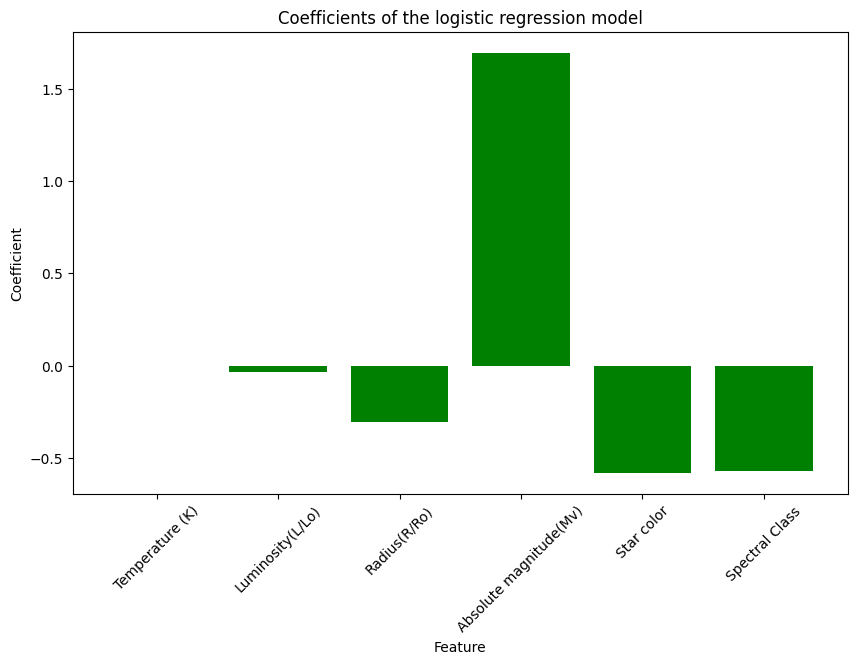

In [17]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, logreg.coef_[0], color="green")
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficients of the logistic regression model")
plt.show()

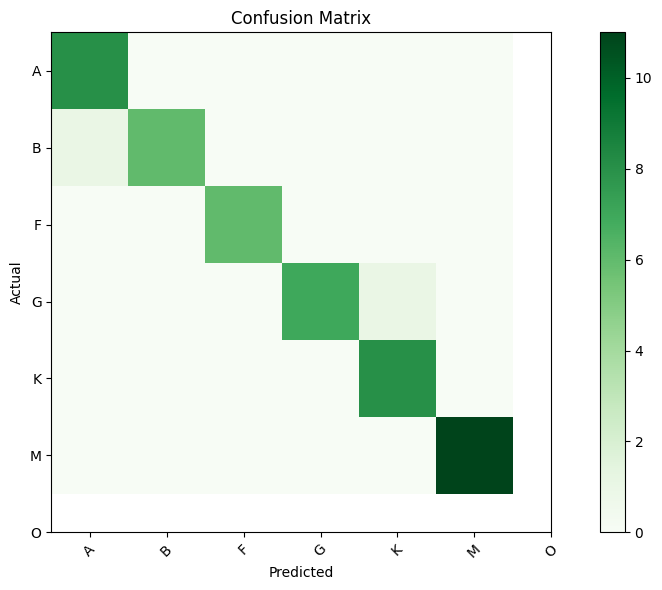

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(cm, cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


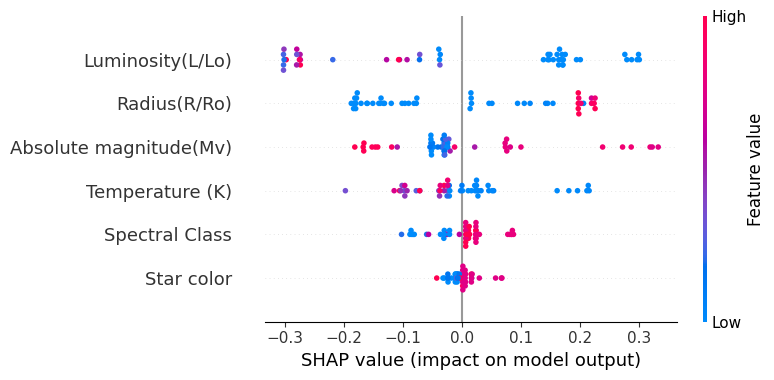

In [32]:
masker = shap.maskers.Independent(X_test)
logreg_callable = lambda x: logreg.predict_proba(x)[:,1]
explainer = shap.Explainer(logreg_callable, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)